In [16]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library alternative to matplotlib.pyplot

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Input data files are available in the "../input/" directory.

# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


In [17]:
data = pd.read_csv("C:/Users/mani sai prasad/Downloads/paysim1/PS_20174392719_1491204439457_log.csv")


In [18]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [19]:
data.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [20]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [21]:
data['isFlaggedFraud'].sum()


16

In [22]:
data.drop(['nameOrig','nameDest','isFlaggedFraud'], axis = 1, inplace=True)


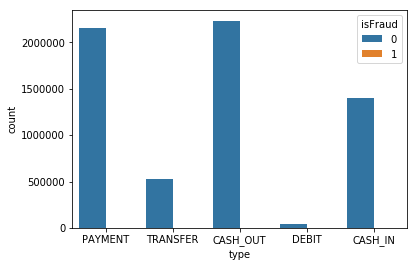

In [23]:
sns.countplot(data['type'], hue = data['isFraud'])


In [24]:
data[data['isFraud']==1].groupby('type').count()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
type,,,,,,,
CASH_OUT,4116,4116,4116,4116,4116,4116,4116
TRANSFER,4097,4097,4097,4097,4097,4097,4097


In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_toScale = data[['amount', 'oldbalanceOrg', 'newbalanceOrig',
      'oldbalanceDest', 'newbalanceDest'
       ]]
new_X = sc.fit(X_toScale)
X_scaled = new_X.transform(X_toScale)


In [26]:
#creating our dataframe with scaled values

scaled_df = pd.DataFrame(X_scaled, columns=['amount', 'oldbalanceOrg', 'newbalanceOrig',
      'oldbalanceDest', 'newbalanceDest'
       ])

In [27]:
# we have also some categorical variable, called Type. Let's convert it to dummies, and then add to our final dataframe
dummy_df = pd.DataFrame(pd.get_dummies(data['type']))
#now, final dataframe
final_df = scaled_df.join(dummy_df, how = 'outer')


In [28]:
final_df.head(5)


,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411,0,0,0,1,0
1,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411,0,0,0,1,0
2,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411,0,0,0,0,1
3,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411,0,1,0,0,0
4,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411,0,0,0,1,0


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
# for future, train test split will be moved into model selection
# from sklearn.model_selection import train_test_split
rfc = RandomForestClassifier() #using default values
#splitting our dataset
X = final_df #dataset that we scaled and preprocessed
y = data['isFraud'] #the column from our original dataset will be our label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #use this random state to match my results only
#training our model
model = rfc.fit(X_train,y_train)
#predicting our labels
predictions = model.predict(X_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))


             precision    recall  f1-score   support

          0       1.00      1.00      1.00   1906351
          1       0.95      0.77      0.85      2435

avg / total       1.00      1.00      1.00   1908786

[[1906262      89]
 [    556    1879]]
